In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import pickle
import pandas as pd
import random
import cv2
np.random.seed(0)


Using TensorFlow backend.


In [3]:
data = pd.read_csv("D:/DC LAB/jadslim-german-traffic-signs-a11dc223e390/signnames.csv")
with open('D:/DC LAB/jadslim-german-traffic-signs-a11dc223e390/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('D:/DC LAB/jadslim-german-traffic-signs-a11dc223e390/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('D:/DC LAB/jadslim-german-traffic-signs-a11dc223e390/test.p', 'rb') as f:
    test_data = pickle.load(f)
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
  
# Printing the shapes
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [4]:
def preprocessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img / 255
    return img
  
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))
  
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [5]:
datagen = ImageDataGenerator(width_shift_range = 0.1, 
                  height_shift_range = 0.1, 
                  zoom_range = 0.2, 
                  shear_range = 0.1, 
                  rotation_range = 10)
datagen.fit(X_train)
  
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [6]:
num_classes = 43
  
def cnn_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), 
                     input_shape =(32, 32, 1), 
                     activation ='relu'))
      
    model.add(Conv2D(60, (5, 5), activation ='relu'))
    model.add(MaxPooling2D(pool_size =(2, 2)))
      
    model.add(Conv2D(30, (3, 3), activation ='relu'))
    model.add(Conv2D(30, (3, 3), activation ='relu'))
    model.add(MaxPooling2D(pool_size =(2, 2)))
      
    model.add(Flatten())
    model.add(Dense(500, activation ='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation ='softmax'))
      
    # Compile model
    model.compile(Adam(lr = 0.001), 
                  loss ='categorical_crossentropy', 
                  metrics =['accuracy'])
    return model
  
model = cnn_model()
history = model.fit_generator(datagen.flow(X_train, y_train, 
                            batch_size = 50), steps_per_epoch = 2000, 
                            epochs = 10, validation_data =(X_val, y_val), 
                            shuffle = 1)

Epoch 1/10
2000/2000 [==============================] - 1289s 645ms/step - loss: 0.9055 - accuracy: 0.7346 - val_loss: 0.1029 - val_accuracy: 0.9696
Epoch 2/10
2000/2000 [==============================] - 1318s 659ms/step - loss: 0.2321 - accuracy: 0.9275 - val_loss: 0.0751 - val_accuracy: 0.9769
Epoch 3/10
2000/2000 [==============================] - 999s 499ms/step - loss: 0.1496 - accuracy: 0.9526 - val_loss: 0.0374 - val_accuracy: 0.9880
Epoch 4/10
2000/2000 [==============================] - 816s 408ms/step - loss: 0.1172 - accuracy: 0.9642 - val_loss: 0.0374 - val_accuracy: 0.9896
Epoch 5/10
2000/2000 [==============================] - 952s 476ms/step - loss: 0.0976 - accuracy: 0.9698 - val_loss: 0.0367 - val_accuracy: 0.9896
Epoch 6/10
2000/2000 [==============================] - 846s 423ms/step - loss: 0.0851 - accuracy: 0.9739 - val_loss: 0.0236 - val_accuracy: 0.9939
Epoch 7/10
2000/2000 [==============================] - 937s 468ms/step - loss: 0.0758 - accuracy: 0.9770 - va

Text(0.5, 0, 'epoch')

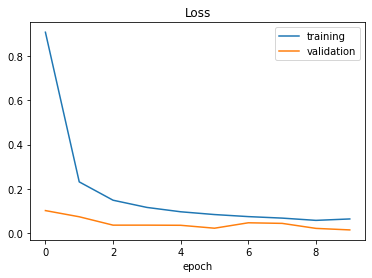

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

KeyError: 'acc'

In [9]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])

Test Loss:  0.11359905943172635
Test Accuracy:  0.9726840853691101


Predicted sign: [1]


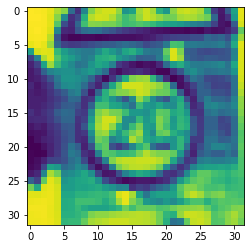

In [11]:
plt.imshow(X_test[990].reshape(32, 32))
print("Predicted sign: "+ str(
        model.predict_classes(X_test[910].reshape(1, 32, 32, 1))))